In [21]:
import pandas as pd

In [22]:
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

True

In [41]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_common_model_sport_vids_30_perc.json", "preds_labels_common_model_sport_vids_30_perc.json")

In [34]:
df = pd.read_json("preds_labels_common_model_sport_vids_30_perc.json")

In [35]:
df.columns.tolist()

['OocRG_9aT3g',
 'OPzh8SUnu-4',
 'p39rR4nLJV0',
 'P8V_bx0L4RY',
 'PBokg31iFAs',
 'piyk0iI9E6Q',
 'pPmllgDFQVI',
 'Pw3_CyFFsXQ',
 'q9bX7EkMvrA',
 'qkRUcYHJ1JI',
 'QtSMXXJq11Q',
 'QuncAUHpl-8',
 'qUUloBe5vEo',
 'QxV2Uj17e8Y',
 'RdNqmKrRmbU',
 'rQWb_oYS1tg',
 'rRsoSIJtKJs',
 'RrxdB1VpYWo',
 'S9KxqRUcnCU']

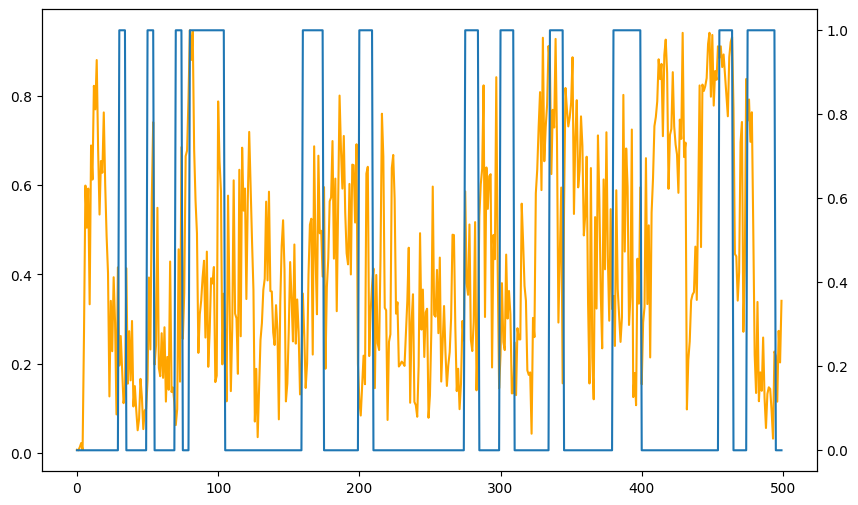

In [36]:
import matplotlib.pyplot as plt
vid_id = 'p39rR4nLJV0'
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange')
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])


In [37]:
for col in df.columns.tolist():
    if len(df[col]['preds']) != len(df[col]['labels']):
        print(f"Skipping {col}")
        df = df.drop(col, axis=1)

In [38]:
from importlib import reload
import metrics as m
reload(m)

mc = m.MetricCalculator(df)
mc.metrics

2024-09-25 21:55:25.869 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-25 21:55:25.870 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-25 21:55:25.875 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-25 22:00:19.058 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-25 22:00:19.060 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-25 22:00:19.071 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-25 22:00:19.071 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-25 22:00:19.077 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


,index,threshold,value
0,f1,0.044189,0.454125
1,accuracy,0.916847,0.713368
2,precision,0.990566,1.000000
3,recall,0.000481,1.000000
4,kappa,0.415857,0.104738
0,roc_auc,NaN,0.575071
1,average_precision,NaN,0.358198
0,accuracy_top5,0.776872,0.515789
1,f1_top5,0.776872,0.680556
2,kappa_top5,0.776872,0.000000


In [ ]:
import metrics as m

all_metrics = []

for obj in boto3.resource("s3").Bucket("auto-shorts").objects.filter(Prefix="data/").all():
    if not obj.key.startswith('data/videos/') and obj.key.endswith('.json'):
        highlight_rt = obj.key[:-5].split("/")[-1]
        boto3.resource("s3").Bucket("auto-shorts").download_file(f"data/{highlight_rt}.json", f"{highlight_rt}.json")
        df = pd.read_json(f"{highlight_rt}.json")
        for col in df.columns.tolist():
            if len(df[col]['preds']) != len(df[col]['labels']):
                print(f"Skipping {col}")
                df = df.drop(col, axis=1)
        all_metrics.append(m.MetricCalculator(df).metrics.assign(highlight_ratio=highlight_rt))
        print(f"Done with {highlight_rt}")

2024-10-01 19:16:48.055 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:16:48.056 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:16:48.061 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:21:00.783 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:21:00.795 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:21:00.805 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:21:00.805 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:21:00.813 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_10_perc


2024-10-01 19:21:02.136 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:21:02.137 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:21:02.142 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:25:17.285 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:25:17.288 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:25:17.298 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:25:17.298 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:25:17.305 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_15_perc


2024-10-01 19:25:18.539 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:25:18.540 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:25:18.544 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:29:35.828 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:29:35.831 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:29:35.840 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:29:35.840 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:29:35.847 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_1_5_std


2024-10-01 19:29:37.093 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:29:37.093 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:29:37.098 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:33:49.616 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:33:49.619 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:33:49.628 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:33:49.629 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:33:49.635 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_1_std


2024-10-01 19:33:50.898 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:33:50.899 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:33:50.903 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:37:54.682 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:37:54.686 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:37:54.694 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:37:54.695 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:37:54.702 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_20_perc


2024-10-01 19:37:55.953 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:37:55.954 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:37:55.958 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:42:06.225 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:42:06.228 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:42:06.238 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:42:06.239 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:42:06.245 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_25_perc


2024-10-01 19:42:07.562 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:42:07.563 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:42:07.567 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:46:22.954 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:46:22.956 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:46:22.965 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:46:22.966 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:46:22.973 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_2_5_std


2024-10-01 19:46:24.225 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:46:24.226 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:46:24.229 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:50:34.360 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:50:34.363 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:50:34.372 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:50:34.372 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:50:34.379 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_2_std


2024-10-01 19:50:35.684 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:50:35.685 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:50:35.689 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:54:32.551 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:54:32.554 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:54:32.562 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:54:32.563 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:54:32.570 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_30_perc


2024-10-01 19:54:33.903 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:54:33.904 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:54:33.908 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:58:35.376 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 19:58:35.378 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 19:58:35.387 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 19:58:35.387 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 19:58:35.394 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_3_perc_1k_epochs


2024-10-01 19:58:36.678 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 19:58:36.679 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 19:58:36.685 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:02:29.399 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:02:29.401 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:02:29.412 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:02:29.413 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:02:29.419 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_3_perc_20_epochs


2024-10-01 20:02:30.827 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:02:30.828 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:02:30.831 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:03:32.145 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:03:32.147 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:03:32.152 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:03:32.153 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:03:32.160 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_10_perc


2024-10-01 20:03:33.483 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:03:33.484 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:03:33.486 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:04:34.863 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:04:34.865 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:04:34.871 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:04:34.872 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:04:34.878 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_15_perc


2024-10-01 20:04:36.114 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:04:36.115 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:04:36.117 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:05:36.947 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:05:36.949 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:05:36.954 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:05:36.955 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:05:36.963 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_5_std


2024-10-01 20:05:38.164 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:05:38.164 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:05:38.167 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:06:39.418 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:06:39.420 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:06:39.426 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:06:39.426 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:06:39.433 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_std


2024-10-01 20:06:40.694 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:06:40.695 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:06:40.697 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:07:42.298 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:07:42.300 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:07:42.305 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:07:42.306 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:07:42.312 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_20_perc


2024-10-01 20:07:43.533 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:07:43.534 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:07:43.537 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:31:54.998 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:31:55.000 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:31:55.007 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:31:55.008 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:31:55.014 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_balanced_sports_vids_30_perc


2024-10-01 20:31:56.658 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:31:56.658 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:31:56.662 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:33:07.564 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:33:07.567 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:33:07.572 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:33:07.573 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:33:07.579 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_comedy_vids_30_perc


2024-10-01 20:33:09.111 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:33:09.112 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:33:09.116 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:37:51.124 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:37:51.127 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:37:51.141 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:37:51.141 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:37:51.149 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_sport_vids_30_perc


2024-10-01 20:37:52.589 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-01 20:37:52.590 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-01 20:37:52.593 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-01 20:39:05.581 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-01 20:39:05.584 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-01 20:39:05.590 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-01 20:39:05.590 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-01 20:39:05.597 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_sports_model_on_comedy_vids_30_perc


In [37]:
all_metrics = pd.concat(all_metrics)
all_metrics
# all_metrics.to_csv("../data/metrics_sport_vids.csv", index=False)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [39]:
all_metrics[(all_metrics['index'] == 'average_precision') | (all_metrics['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
1,average_precision,NaN,0.129459,preds_labels_10_perc
1,average_precision_top5,NaN,0.243900,preds_labels_10_perc
1,average_precision,NaN,0.190677,preds_labels_15_perc
1,average_precision_top5,NaN,0.519450,preds_labels_15_perc
1,average_precision,NaN,0.088365,preds_labels_1_5_std
1,average_precision_top5,NaN,0.351180,preds_labels_1_5_std
1,average_precision,NaN,0.125690,preds_labels_1_std
1,average_precision_top5,NaN,0.184028,preds_labels_1_std
1,average_precision,NaN,0.213430,preds_labels_20_perc
1,average_precision_top5,NaN,0.432466,preds_labels_20_perc


In [42]:
all_metrics[(all_metrics['index'] == 'f1') | (all_metrics['index'] == 'f1_top5')]

,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
1,f1_top5,8.366333e-01,0.416667,preds_labels_10_perc
0,f1,7.974493e-04,0.261606,preds_labels_15_perc
1,f1_top5,9.038951e-01,0.571429,preds_labels_15_perc
0,f1,1.080694e-02,0.145251,preds_labels_1_5_std
1,f1_top5,9.333601e-02,0.272727,preds_labels_1_5_std
0,f1,2.554644e-02,0.202057,preds_labels_1_std
1,f1_top5,5.250162e-01,0.333333,preds_labels_1_std
0,f1,8.189845e-06,0.322532,preds_labels_20_perc
1,f1_top5,9.654601e-01,0.515625,preds_labels_20_perc


In [43]:
all_metrics.to_csv("../data/metrics_balanced_models.csv", index=False)

In [22]:
metrics_sports = pd.read_csv("../data/metrics_sport_vids.csv")
metrics_sports[(metrics_sports['index'] == 'average_precision') | (metrics_sports['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
6,average_precision,NaN,0.129459,preds_labels_10_perc
13,average_precision_top5,NaN,0.243900,preds_labels_10_perc
20,average_precision,NaN,0.190677,preds_labels_15_perc
27,average_precision_top5,NaN,0.519450,preds_labels_15_perc
34,average_precision,NaN,0.213430,preds_labels_20_perc
41,average_precision_top5,NaN,0.432466,preds_labels_20_perc
48,average_precision,NaN,0.241969,preds_labels_25_perc
55,average_precision_top5,NaN,0.349986,preds_labels_25_perc
62,average_precision,NaN,0.322803,preds_labels_30_perc
69,average_precision_top5,NaN,0.658278,preds_labels_30_perc


In [23]:
metrics_sports[(metrics_sports['index'] == 'f1') | (metrics_sports['index'] == 'f1_top5')]


,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
8,f1_top5,8.366333e-01,0.416667,preds_labels_10_perc
14,f1,7.974493e-04,0.261606,preds_labels_15_perc
22,f1_top5,9.038951e-01,0.571429,preds_labels_15_perc
28,f1,8.189845e-06,0.322532,preds_labels_20_perc
36,f1_top5,9.654601e-01,0.515625,preds_labels_20_perc
42,f1,4.917386e-07,0.387509,preds_labels_25_perc
50,f1_top5,9.972608e-01,0.480000,preds_labels_25_perc
56,f1,1.460427e-08,0.451618,preds_labels_30_perc
64,f1_top5,9.982424e-01,0.689655,preds_labels_30_perc


In [134]:
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_comedy_10_perc.json", "preds_labels_comedy_10_perc.json")
df = pd.read_json("preds_labels_comedy_10_perc.json")

In [40]:
df.columns

Index(['sQDrj7JOAYQ', 'uCSqeI29D_I', 'VeYRaOV0I_Y', 'w6OJl42Ntko',
       'WA4a8ouaars', 'WA5_ledA_9k', 'wdAva6xBjOQ', 'xYQ28eu35gI',
       'YpjwHazhknA'],
      dtype='object')

In [118]:
import sys
sys.path.append('../auto_shorts/upload/db')
from utils import postgres_engine

In [141]:
vid_id = 'w6OJl42Ntko'

In [142]:
import json
vid_path = pd.read_sql('select s3_path from videos where id = %s', con=postgres_engine, params=(vid_id,)).iloc[0,0]
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{vid_path}/video_data.json", "video_data.json")
with open("video_data.json") as f:
    moments = pd.DataFrame(
                    json.load(f)["most_watched_moments"]
                )
watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']

In [143]:
import heapq
preds_vid = heapq.nlargest(5, df[vid_id].loc["preds"])
indices_vid = [df[vid_id].loc["preds"].index(p) for p in preds_vid]

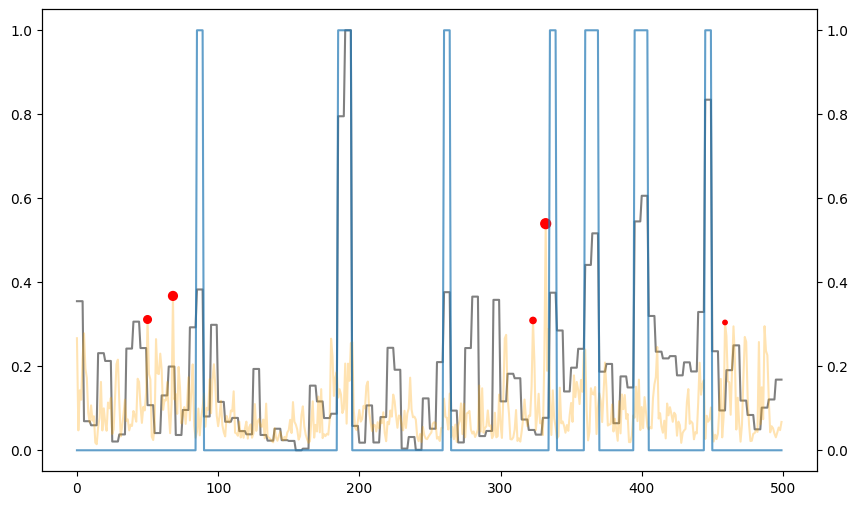

In [144]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(watched_score, color='grey')
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'], alpha=0.7)
ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)])

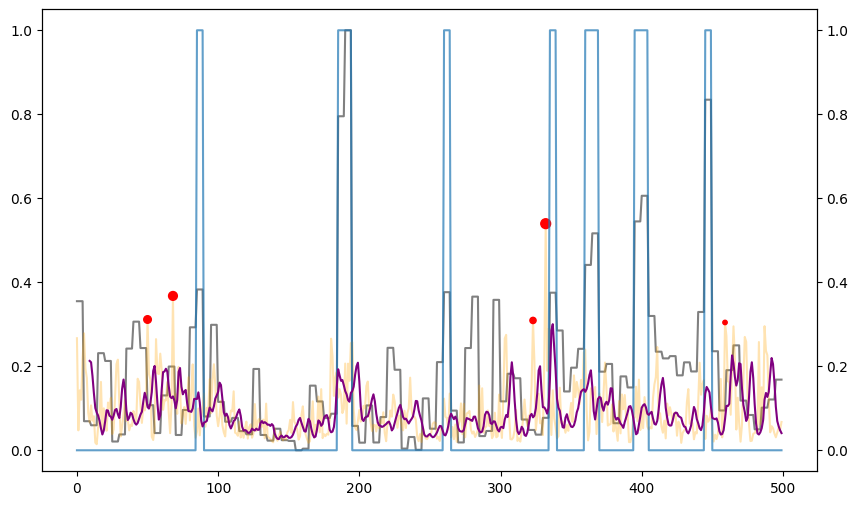

In [145]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(watched_score, color='grey')
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'], alpha=0.7)
ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)])
# add line plot of moving average of preds
ax2.plot(pd.Series(df[vid_id]['preds']).rolling(window=10, win_type='exponential').mean(), color='purple')